# Experimental Data

In this notebook, you can explore the experimental data interactively. The data can be accessed via a simple implementation of a database:

- `map_curated.csv` is an overview table, that contains metadata on individual cells, and contains links to the location, where the corresponding timecourse data is stored
- individual csv-files containing the timecourse data

For detailed information on this implementation, visit https://github.com/el-uhu/IDAT


In [21]:
# Load dependencies
include("custom_code/utilities.jl")
include("custom_code/plot_data.jl")

get_range (generic function with 1 method)

## Load data
First, we have to load the data, and extract thre data of interest.

In [ ]:
#Load data
S = Spec("specs.yml")
D = readtable(joinpath(S.path, "map_curated.csv"));

Now, let's take a look at the structure of the datatable...

In [17]:
#Print the first 6 lines of the table
head(D)

,experiment,well,celltype,analyte,nocodazole_dose_ng_ml,treatment,dose_uM,time_in_noc_min,aim,cell_id,data_table,complete,imin,imax,tstep,comment,curated,meta,ana
1,2011,C03,HeLa,Securin-eGFP,0,RNAi-Allstar,0.0,0,"RNAi – Mad2, Noc, Control",2011_C03,/home/nbuser/thesis-notebooks/Chapter5/data/extracted/2011/C03.csv,1,40,78,3.6010179259,no comment,1,44,48
2,2011,C03,HeLa,Securin-eGFP,0,RNAi-Allstar,0.0,0,"RNAi – Mad2, Noc, Control",2011_C03 (2),/home/nbuser/thesis-notebooks/Chapter5/data/extracted/2011/C03 (2).csv,1,38,76,3.6010179259,no comment,1,40,46
3,2011,C03,HeLa,Securin-eGFP,0,RNAi-Allstar,0.0,0,"RNAi – Mad2, Noc, Control",2011_C03 (3),/home/nbuser/thesis-notebooks/Chapter5/data/extracted/2011/C03 (3).csv,1,198,237,3.6010179259,no comment,1,201,206
4,2011,C03,HeLa,Securin-eGFP,0,RNAi-Allstar,0.0,0,"RNAi – Mad2, Noc, Control",2011_C03 (4),/home/nbuser/thesis-notebooks/Chapter5/data/extracted/2011/C03 (4).csv,1,63,102,3.6010179259,manual cutoff,1,66,72
5,2011,C03,HeLa,Securin-eGFP,0,RNAi-Allstar,0.0,0,"RNAi – Mad2, Noc, Control",2011_C03 (5),/home/nbuser/thesis-notebooks/Chapter5/data/extracted/2011/C03 (5).csv,1,86,125,3.6010179259,manual cutoff,1,89,92
6,2011,C03,HeLa,Securin-eGFP,0,RNAi-Allstar,0.0,0,"RNAi – Mad2, Noc, Control",2011_C03 (6),/home/nbuser/thesis-notebooks/Chapter5/data/extracted/2011/C03 (6).csv,1,132,171,3.6010179259,manual cutoff,1,135,140


## Data of interest

In order to access the data of interest more easily, we will next reduce/split the tables...

To this end, we will use **logical indexing**, a method to "filter" the dataset based on a logical condition.

```
                  Logical condition
                          |        +-necessary for the algorithm to return all columns of the filtered table
                  +-------------+  |

D[D[:column_name] .== "condition", :]

| +-------------+
|        |
|        +---Column on which the filtering is to be applied
|
+---Dataset
```

In [28]:
# Get HeLa data
H = D[D[:celltype] .== "HeLa", :];
#...RO-3306-treated cells
HR = H[H[:treatment] .== "RO-3306", :];
#...Nocodazole-treated cells
HN = H[H[:treatment] .== "noc_only", :];
#...additional filter to get the Nocodazole-treated cells that did not die
HN = HN[HN[:ana] .!= 0.0, :];
# Control cells
hctrl = [id for id in H[H[:treatment] .== "untreated", :cell_id]];

# ...same for RPE1 cells
R = D[D[:celltype] .== "RPE1", :];
RR = R[R[:treatment] .== "RO-3306", :];
RN = R[R[:treatment] .== "noc_only", :];
RN = RN[RN[:ana] .!= 0.0, :];

#Each cell has a unique id. For convenience we'll extract the cell-ids, and map them to the RO-dose
hro = Dict([d => [id for id in HR[HR[:dose_uM] .== d,:][:cell_id]] for d in unique(HR[:dose_uM])]);
rro = Dict([d => [id for id in RR[RR[:dose_uM] .== d,:][:cell_id]] for d in unique(RR[:dose_uM])]);

#Add the data for cells treated with nocodazole alone
hro[0.0] = [id for id in HN[:cell_id]];
rro[0.0] = [id for id in RN[:cell_id]];

Now, let's have a look at what we have generated...

In [30]:
rro

Dict{Any,Array{T,N}} with 9 entries:
  0.0  => Any["2919_D7S1 (3)","2919_D7S1 (5)","3331_F4S1 (2)","3331_F4S3 (2)","…
  4.0  => Any["2868_C7S1","2868_C7S1 (2)","2868_C7S1 (3)","2868_C7S1 (4)","2868…
  10.0 => Any["2738_D11S1","2738_D11S1 (2)","2738_D11S1 (3)","2738_D11S1 (4)"]
  3.0  => Any["2919_C6S1","2919_C6S1 (2)","2919_C6S1 (3)-entry","2919_C6S1 (4)-…
  2.5  => Any["2738_G11S1","2738_G11S1 (2)","2738_G11S1 (3)"]
  1.5  => Any["2919_C7S1","2919_C7S2","2919_C7S2 (2)","2919_C7S2 (3)","2919_C7S…
  8.0  => Any["2868_E7S1","2868_E7S1 (2)","2868_E7S1 (3)","2868_E7S1 (4)","2868…
  0.75 => Any["2919_D6S1","2919_D6S1 (2)","2919_D6S1 (3)","2919_D6S1 (4)","2919…
  20.0 => Any["2738_C11S1","2738_C11S1 (2)","2738_C11S1 (3)","2738_C11S1 (4)"]

We now have a map of RO-3306-dose and unique cell_id for each celltype.

In [29]:
#Plotting function
function plot_dataset(dataset; xmax = 100, ymax = 1.2)
    
    #Make an empty plot, and set range and label of axes
    sp = subplot(111)
    sp[:set_xlim]([0,xmax])
    sp[:set_ylim]([0,ymax])
    sp[:set_xlabel]("time after RO-3306 addition (min)")
    sp[:set_ylabel]("normalised fluorescence")

    #Loop over all cell_ids in the dataset and plot the timecourse
    for (n,i) in enumerate(dataset)
      plotcell(sp, D, i; color = "k", alpha = 0.5)
    end
end

plot_dataset (generic function with 1 method)

## Nocodazole

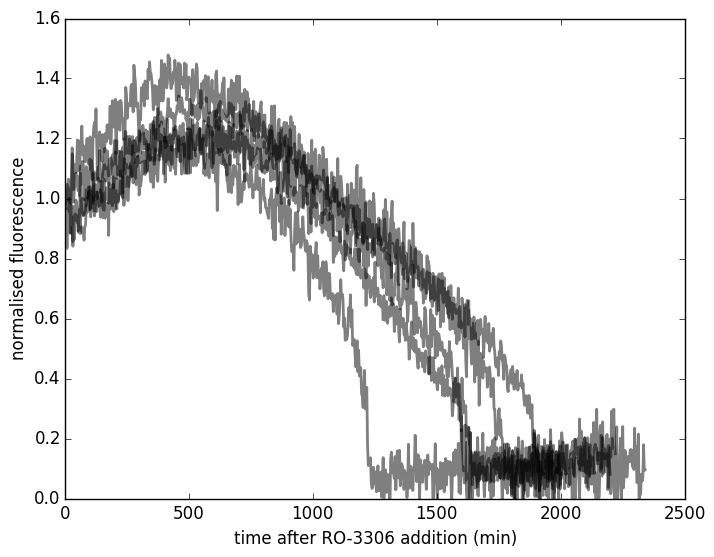

In [20]:
plot_dataset(rro[0.0], xmax = 2500, ymax = 1.6)

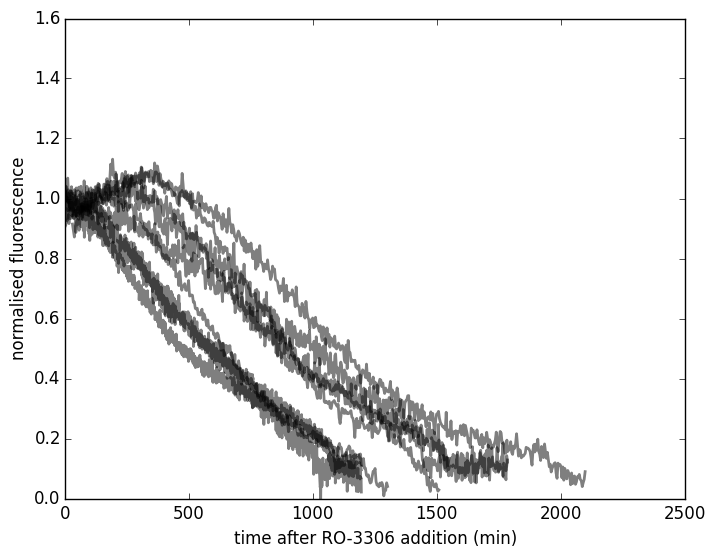

In [24]:
plot_dataset(hro[0.0], xmax = 2500, ymax = 1.6)

## High-dose RO-3306

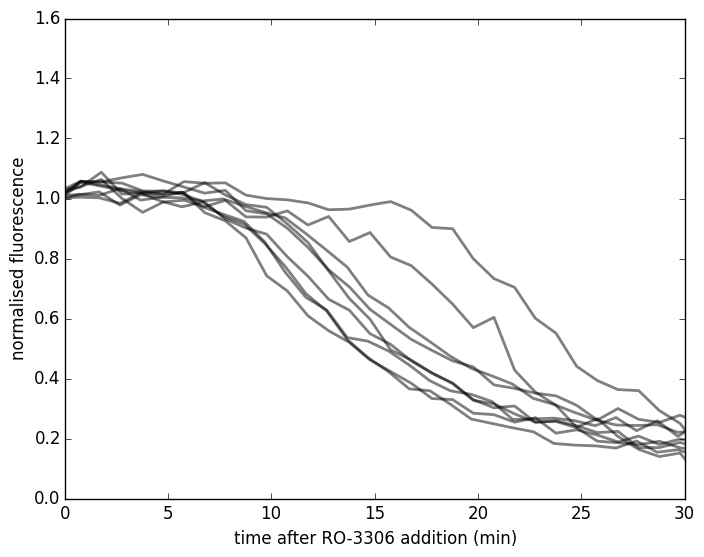

In [26]:
plot_dataset(hro[13.3], xmax = 30, ymax = 1.6)

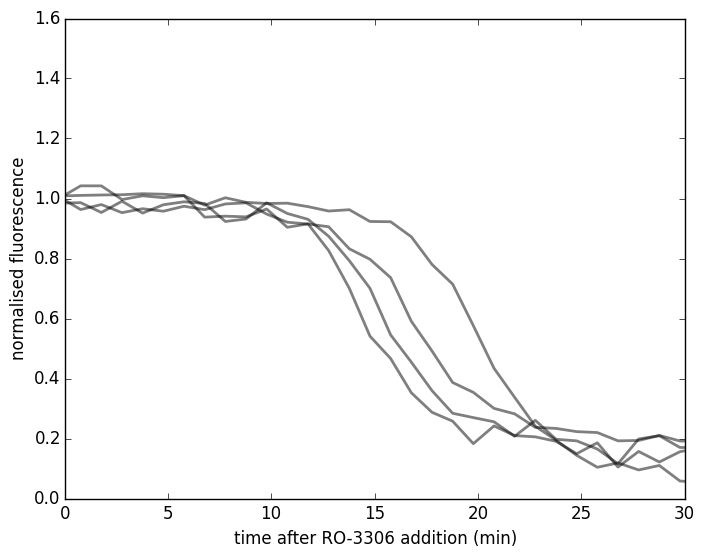

In [27]:
plot_dataset(rro[10.0], xmax = 30, ymax = 1.6)